Universidade Federal do Rio Grande do Norte (UFRN)

Centro de Ciências Exatas e da Terra (CCET)

Departamento de Ciências Atmosféricas e Climáticas (DCAC)

Programa de Pós Graduação em Ciências Climáticas (PPGCC)

Disciplina: Meteorologia Básica

Discente: Cleiza Cristiano

Relatório: Umidade relativa

Dados: Instituto Nacional de Meteorologia (período: 2010 a 2019)

Ultima atualização: 15/05/2024

# Plot anual

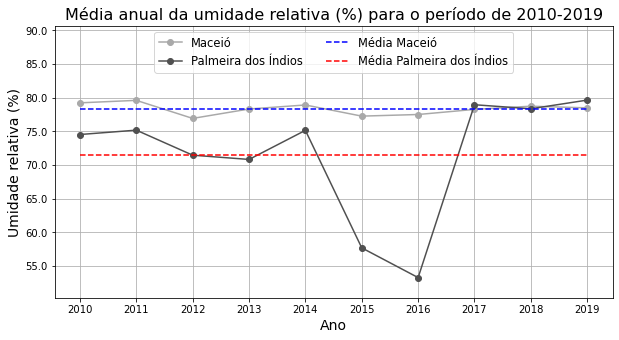

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Carregar os dados do Excel para ambas as cidades
caminho_arquivo_cidade1 = "C:/Users/Cleiza/Documents/Doutorado_PPGCC/2024.1/Meteorologia_Básica/Dado_OK/Maceio.xlsx"
caminho_arquivo_cidade2 = "C:/Users/Cleiza/Documents/Doutorado_PPGCC/2024.1/Meteorologia_Básica/Dado_OK/Palmeira_dos_indios.xlsx"

dados_cidade1 = pd.read_excel(caminho_arquivo_cidade1)
dados_cidade2 = pd.read_excel(caminho_arquivo_cidade2)

# Extrair o ano de cada data para ambas as cidades
dados_cidade1['Ano'] = dados_cidade1['Data'].dt.year
dados_cidade2['Ano'] = dados_cidade2['Data'].dt.year

# Calcular o acumulado anual de precipitação para ambas as cidades
acumulado_por_ano_cidade1 = dados_cidade1.groupby('Ano')['ur (%)'].mean()
acumulado_por_ano_cidade2 = dados_cidade2.groupby('Ano')['ur (%)'].mean()

# Calcular a média do acumulado anual de precipitação para cada cidade
media_acumulado_cidade1 = acumulado_por_ano_cidade1.mean()
media_acumulado_cidade2 = acumulado_por_ano_cidade2.mean()

# Definir a largura das barras
largura_barra = 0.35

# Definir a posição das barras para cada cidade
posicao_barra = range(len(acumulado_por_ano_cidade1))

# Plotar acumulado anual de precipitação com gráfico de linhas para ambas as cidades
plt.figure(figsize=(10, 5))

# Plotar linha para Cidade 1
plt.plot(posicao_barra, acumulado_por_ano_cidade1, marker='o', color='#A9A9A9', label='Maceió')

# Plotar linha para Cidade 2
plt.plot(posicao_barra, acumulado_por_ano_cidade2, marker='o', color='#505050', label='Palmeira dos Índios')

# Plotar linha representando a média do acumulado anual para cada cidade
plt.plot(posicao_barra, [media_acumulado_cidade1] * len(posicao_barra), color='blue', linestyle='--', label='Média Maceió')
plt.plot(posicao_barra, [media_acumulado_cidade2] * len(posicao_barra), color='red', linestyle='--', label='Média Palmeira dos Índios')

# Ajustar o formato do eixo y para uma casa decimal
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Ajustar legendas e rótulos
plt.legend(loc='upper center', fontsize=11.5, ncol=2)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Umidade relativa (%)', fontsize=14)
plt.title('Média anual da umidade relativa (%) para o período de 2010-2019', fontsize=16)
plt.grid(True)

# Definir os limites do eixo y para mostrar todos os dados
plt.ylim(min(acumulado_por_ano_cidade1.min(), acumulado_por_ano_cidade2.min()) - 3.0,
         max(acumulado_por_ano_cidade1.max(), acumulado_por_ano_cidade2.max()) + 11.0)

# Definir os marcadores no eixo x entre as barras das variáveis para cada ano
plt.xticks(posicao_barra, acumulado_por_ano_cidade1.index)

plt.show()


# Plot mensal

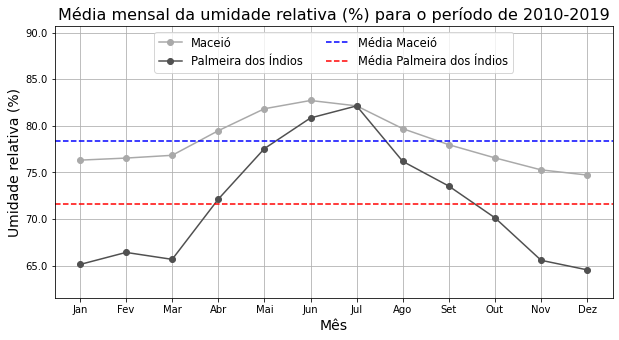

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.dates import MonthLocator, DateFormatter

# Carregar os dados do Excel para ambas as cidades
caminho_arquivo_cidade1 = "C:/Users/Cleiza/Documents/Doutorado_PPGCC/2024.1/Meteorologia_Básica/Dado_OK/Maceio.xlsx"
caminho_arquivo_cidade2 = "C:/Users/Cleiza/Documents/Doutorado_PPGCC/2024.1/Meteorologia_Básica/Dado_OK/Palmeira_dos_indios.xlsx"

dados_cidade1 = pd.read_excel(caminho_arquivo_cidade1)
dados_cidade2 = pd.read_excel(caminho_arquivo_cidade2)

# Calcular a média mensal de temperatura para cada cidade
media_mensal_cidade1 = dados_cidade1.groupby(dados_cidade1['Data'].dt.month)['ur (%)'].mean()
media_mensal_cidade2 = dados_cidade2.groupby(dados_cidade2['Data'].dt.month)['ur (%)'].mean()

# Definir a largura das barras
largura_barra = 0.35

# Definir a posição das barras para cada mês
posicao_barra = range(1, 13)

# Plotar média mensal de temperatura com gráfico de linhas para ambas as cidades
plt.figure(figsize=(10, 5))

# Plotar linha para Cidade 1
plt.plot(posicao_barra, media_mensal_cidade1, marker='o', color='#A9A9A9', label='Maceió')

# Plotar linha para Cidade 2
plt.plot(posicao_barra, media_mensal_cidade2, marker='o', color='#505050', label='Palmeira dos Índios')

# Calcular a média do acumulado anual de precipitação para cada cidade
media_acumulado_cidade1 = media_mensal_cidade1.mean()
media_acumulado_cidade2 = media_mensal_cidade2.mean()

# Plotar linha representando a média mensal de temperatura para cada cidade
plt.axhline(y=media_acumulado_cidade1, color='blue', linestyle='--', label='Média Maceió')
plt.axhline(y=media_acumulado_cidade2, color='red', linestyle='--', label='Média Palmeira dos Índios')

# Ajustar o formato do eixo y para uma casa decimal
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Ajustar legendas e rótulos
plt.legend(loc='upper center', fontsize=11.5, ncol=2)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Umidade relativa (%)', fontsize=14)
plt.title('Média mensal da umidade relativa (%) para o período de 2010-2019', fontsize=16)
plt.grid(True)

# Definir os limites do eixo y para mostrar todos os dados
plt.ylim(min(min(media_mensal_cidade1), min(media_mensal_cidade2)) - 3.0,
         max(max(media_mensal_cidade1), max(media_mensal_cidade2)) + 8.0)

# Definir os marcadores no eixo x entre as barras das variáveis para cada mês
meses_abreviados = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(posicao_barra, meses_abreviados)

plt.show()


# Plot horário

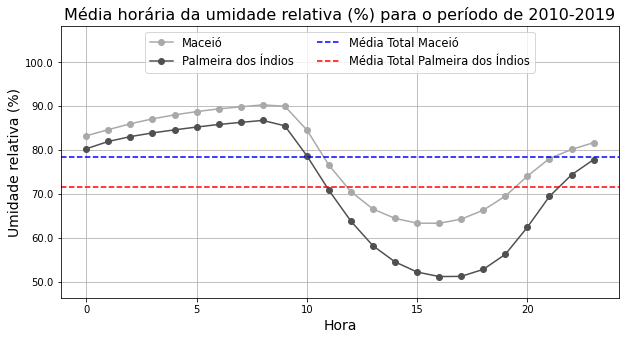

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Carregar os dados do Excel para ambas as cidades
caminho_arquivo_cidade1 = "C:/Users/Cleiza/Documents/Doutorado_PPGCC/2024.1/Meteorologia_Básica/Dado_OK/Maceio.xlsx"
caminho_arquivo_cidade2 = "C:/Users/Cleiza/Documents/Doutorado_PPGCC/2024.1/Meteorologia_Básica/Dado_OK/Palmeira_dos_indios.xlsx"

dados_cidade1 = pd.read_excel(caminho_arquivo_cidade1)
dados_cidade2 = pd.read_excel(caminho_arquivo_cidade2)

# Calcular a média de vento para cada hora do dia para cada cidade
media_por_hora_cidade1 = dados_cidade1.groupby('Hora')['ur (%)'].mean()
media_por_hora_cidade2 = dados_cidade2.groupby('Hora')['ur (%)'].mean()

# Plotar média de vento para cada hora do dia para ambas as cidades
plt.figure(figsize=(10, 5))

# Plotar linha para Cidade 1
plt.plot(media_por_hora_cidade1.index, media_por_hora_cidade1, marker='o', color='#A9A9A9', label='Maceió')

# Plotar linha para Cidade 2
plt.plot(media_por_hora_cidade2.index, media_por_hora_cidade2, marker='o', color='#505050', label='Palmeira dos Índios')

# Calcular a média total de cada cidade
media_total_cidade1 = dados_cidade1['ur (%)'].mean()
media_total_cidade2 = dados_cidade2['ur (%)'].mean()

# Plotar linha representando a média total para cada cidade
plt.axhline(y=media_total_cidade1, color='blue', linestyle='--', label='Média Total Maceió')
plt.axhline(y=media_total_cidade2, color='red', linestyle='--', label='Média Total Palmeira dos Índios')

# Ajustar o formato do eixo y para uma casa decimal
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Ajustar legendas e rótulos
plt.legend(loc='upper center', fontsize=11.5, ncol=2)
plt.xlabel('Hora', fontsize=14)
plt.ylabel('Umidade relativa (%)', fontsize=14)
plt.title('Média horária da umidade relativa (%) para o período de 2010-2019', fontsize=16)
plt.grid(True)

# Definir os limites do eixo y para mostrar todos os dados
plt.ylim(min(min(media_por_hora_cidade1), min(media_por_hora_cidade1)) - 17.0,
         max(max(media_por_hora_cidade1), max(media_por_hora_cidade1)) + 18.0)


plt.show()